# Interesting Application of Two Factor Anova Ancova
Testing The Effects of Price and Advertising

Newfood
Product Management opted to conduct a market test
Experiment using a balanced two factor design with three levels
of price(low, medium, high) and two levels of advertising (low
and high). Each combination of price and advertising was used in
four different stores resulting in a total of 24 observations. The
data are given in paul newfood.csv. Perform anova ancova and
interpret the results.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from statsmodels.formula.api import ols      # For n-way ANOVA
from statsmodels.stats.anova import _get_covariance,anova_lm # For n-way ANOVA
%matplotlib inline

In [2]:
DF = pd.read_csv('paul-newfood.csv')

In [3]:
DF.head()

,Sales,PriceLevel,AdLevel,StoreSize
0,620,1,1,34
1,774,1,1,41
2,955,1,2,32
3,669,1,2,28
4,623,1,1,34


We will use Sales, PriceLevel, AdLevel for ANOVA, and for ANCoVA we will use Sales, PriceLevel, AdLevel and StoreSize as well

In [4]:
DF.describe()

,Sales,PriceLevel,AdLevel,StoreSize
count,24.000000,24.000000,24.000000,24.000000
mean,571.416667,2.000000,1.500000,32.333333
std,212.629279,0.834058,0.510754,6.424590
min,294.000000,1.000000,1.000000,19.000000
25%,393.250000,1.000000,1.000000,28.750000
50%,550.000000,2.000000,1.500000,32.000000
75%,677.000000,3.000000,2.000000,37.000000
max,1208.000000,3.000000,2.000000,43.000000


In [5]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Sales       24 non-null     int64
 1   PriceLevel  24 non-null     int64
 2   AdLevel     24 non-null     int64
 3   StoreSize   24 non-null     int64
dtypes: int64(4)
memory usage: 896.0 bytes


In [6]:
DF.PriceLevel = pd.Categorical(DF.PriceLevel)

In [7]:
DF.PriceLevel.value_counts

<bound method IndexOpsMixin.value_counts of 0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     2
9     2
10    2
11    2
12    2
13    2
14    2
15    2
16    3
17    3
18    3
19    3
20    3
21    3
22    3
23    3
Name: PriceLevel, dtype: category
Categories (3, int64): [1, 2, 3]>

In [8]:
DF.AdLevel = pd.Categorical(DF.AdLevel)

In [9]:
DF.AdLevel.value_counts

<bound method IndexOpsMixin.value_counts of 0     1
1     1
2     2
3     2
4     1
5     1
6     2
7     2
8     1
9     1
10    2
11    2
12    1
13    1
14    2
15    2
16    1
17    1
18    2
19    2
20    1
21    1
22    2
23    2
Name: AdLevel, dtype: category
Categories (2, int64): [1, 2]>

In [10]:
formula = 'Sales ~ C(PriceLevel) + C(AdLevel)' #a simple 2 way ANOVA where Sales if a function of PriceLevel + AdLevel, C stands for categorical
model = ols(formula, DF).fit() #building model using ols (ordinary least squares is a regression technique) function for dataset DF and fitting the same on it
aov_table = anova_lm(model) #creating ANOVA table, passing model to anova_lm function
#print(model.summary())
print(aov_table)

                 df         sum_sq        mean_sq          F    PR(>F)
C(PriceLevel)   2.0  600412.583333  300206.291667  13.663982  0.000182
C(AdLevel)      1.0      32.666667      32.666667   0.001487  0.969624
Residual       20.0  439412.583333   21970.629167        NaN       NaN


degrees of freedom=n-1, residual is total variation, mean_sq= sum_sq/df, computing F statistics is ratio of mean_sq b/w groups to mean_sq within groups i.e mean_sq/residual

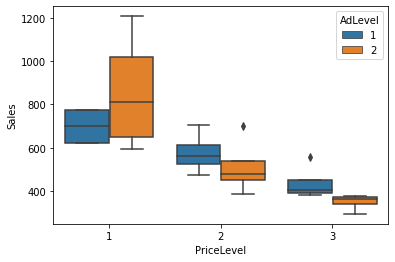

In [15]:
sns.boxplot(x='PriceLevel', y='Sales', data=DF, hue='AdLevel')

The graph clearly indicates that higher advertising level has a good impact on sales of a low priced product, however as the price increases the higher advertisement is not impacting the sales in a good way.

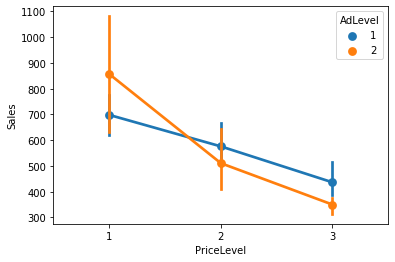

In [11]:
sns.pointplot(x='PriceLevel', y='Sales', data=DF, hue='AdLevel')

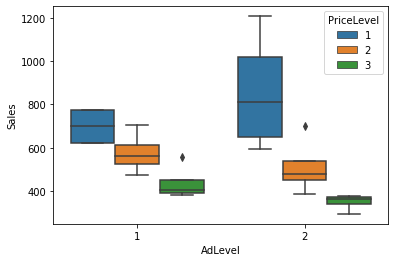

In [18]:
sns.boxplot(x='AdLevel', y='Sales', data=DF, hue='PriceLevel')

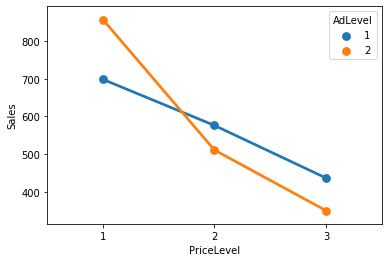

In [12]:
sns.pointplot(x='PriceLevel', y='Sales', data=DF, hue='AdLevel', ci=None)

In [13]:
formula = 'Sales ~ C(PriceLevel) + C(AdLevel) + C(PriceLevel):C(AdLevel)'
model = ols(formula, DF).fit()
aov_table = anova_lm(model)
print(aov_table)

                            df         sum_sq        mean_sq          F  \
C(PriceLevel)              2.0  600412.583333  300206.291667  14.781913   
C(AdLevel)                 1.0      32.666667      32.666667   0.001608   
C(PriceLevel):C(AdLevel)   2.0   73850.083333   36925.041667   1.818159   
Residual                  18.0  365562.500000   20309.027778        NaN   

                            PR(>F)  
C(PriceLevel)             0.000159  
C(AdLevel)                0.968450  
C(PriceLevel):C(AdLevel)  0.190898  
Residual                       NaN  


In [14]:
formula = 'Sales ~ C(PriceLevel) + C(AdLevel) + StoreSize + C(PriceLevel):C(AdLevel)'
model = ols(formula, DF).fit()
aov_table = anova_lm(model,type=2)
print(aov_table)

                            df         sum_sq        mean_sq          F  \
C(PriceLevel)              2.0  600412.583333  300206.291667  29.483426   
C(AdLevel)                 1.0      32.666667      32.666667   0.003208   
C(PriceLevel):C(AdLevel)   2.0   73850.083333   36925.041667   3.626429   
StoreSize                  1.0  192465.010526  192465.010526  18.902095   
Residual                  17.0  173097.489474   10182.205263        NaN   

                            PR(>F)  
C(PriceLevel)             0.000003  
C(AdLevel)                0.955492  
C(PriceLevel):C(AdLevel)  0.048790  
StoreSize                 0.000438  
Residual                       NaN  
